1.CÁC BƯỚC CỦA THUẬT TOÁN KMEANS

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

class KMeans():
    def __init__(self,k,max_iteration=10):
        self.k=k
        self.max_iteration=max_iteration
        self.all_centroids=[]
        self.all_labels=[]

    #Hàm thuật toán KMeans lấy đầu vào là một bộ dữ liệu và số lượng cluster k.Trả về tâm của k cụm
    def fit(self,dataset):
        #Khởi tạo ngẫu nhiên K centroids:
        numFeatures=dataset.shape[1]
        centroids=self.get_random_centroids(numFeatures,self.k)
        self.all_centroids.append(centroids)
        self.all_labels.append(None)

    #Khởi tạo các biến iteration, oldCentroids
        iteration=0
        oldCentroids=None
        
        while not self.should_stop(oldCentroids,centroids,iteration):
            #Lưu lại centroids cũ cho quá trình kiểm tra hội tụ
            oldCentroids=centroids
            iteration+=1

            #Gán nhãn cho mỗi điểm dữ liệu dựa vào centroids
            labels=self.get_labels(dataset,centroids)
            self.all_labels.append(labels)

            # Cập nhật centroids dựa vào nhãn dữ liệu
            # print('0ld centroids: ', centroids)
            centroids = self.get_centroids(dataset, labels, self.k)
            # print('new centroids: ', centroids)
            self.all_centroids.append(centroids)
        return centroids
    
    #Hàm khởi tạo centroids ngẫu nhiên
    def get_random_centroids(self,numFeatures,k):
        return np.random.rand(k,numFeatures)
    
    #Hàm trả về nhãn cho mỗi điểm dữ liệu trong dataset:
    def get_labels(self,dataset,centroids):
        #Với mỗi điểm quan sát trong dataset, lựa chọn centroids gần nhất để gán nhãn:
        labels=[]
        for x in dataset:
            #Tính khoảng cách đến các centroids và cập nhật nhãn
            distances=np.sum((x-centroids)**2,axis=1)
            label=np.argmin(distances)
            labels.append(label)
        return labels
    # Hàm này trả về True hoặc False nếu k-Means hoàn thành. Điều kiện k-Means hoàn thành là 
    # thuật toán vượt ngưỡng số lượng vòng lặp hoặc centroids ngừng thay đổi
    def should_stop(self,oldCentroids,centroids,iterations):
        if iterations>self.max_iteration:
            return True
        return np.all(oldCentroids==centroids)
    
    #Trả về tọa độ mới cho k centroids của mỗi chiều
    def get_centroids(self,dataset,labels,k):
        centroids=[]
        for j in np.arange(k):
            idx_j = np.where(np.array(labels) == j)[0]
            centroid_j = dataset[idx_j, :].mean(axis=0)
            centroids.append(centroid_j)
        return np.array(centroids)
dataset, _ = make_blobs(n_samples=250, cluster_std=3.0, random_state=123)

kmean = KMeans(k=2, max_iteration=8)
centroids = kmean.fit(dataset)

    

    

#Another example of KMeans:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


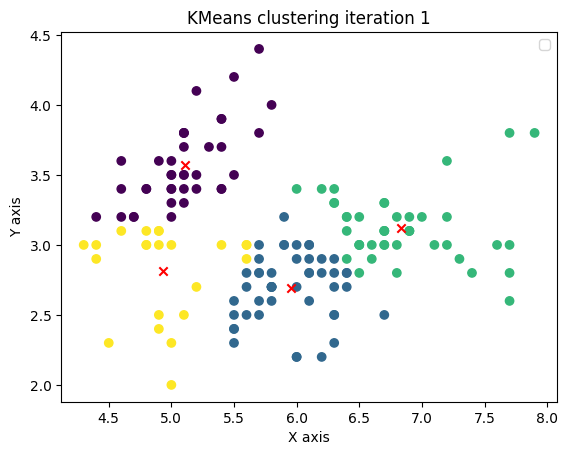

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


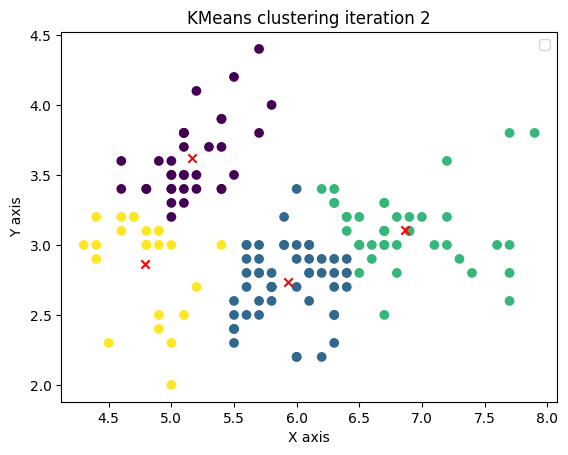

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


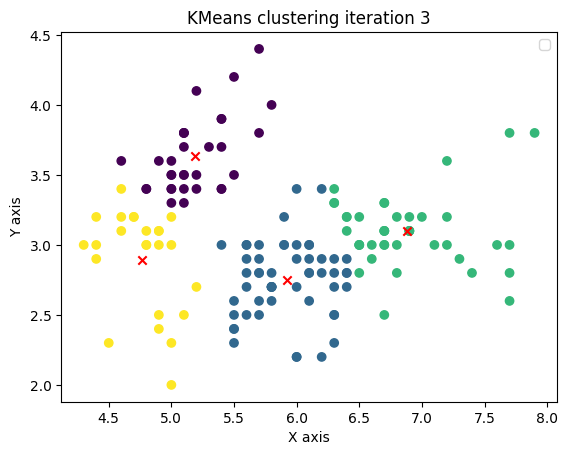

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


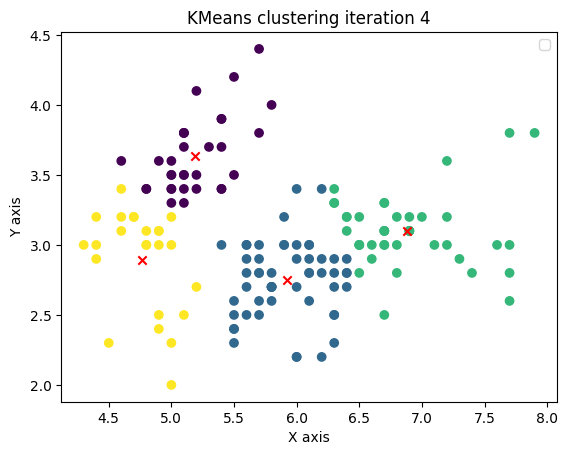

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


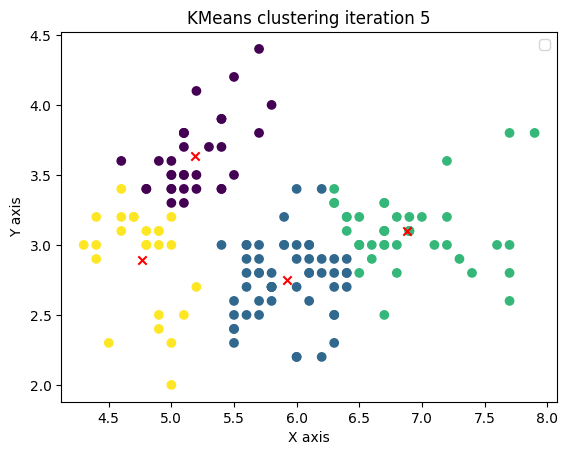

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


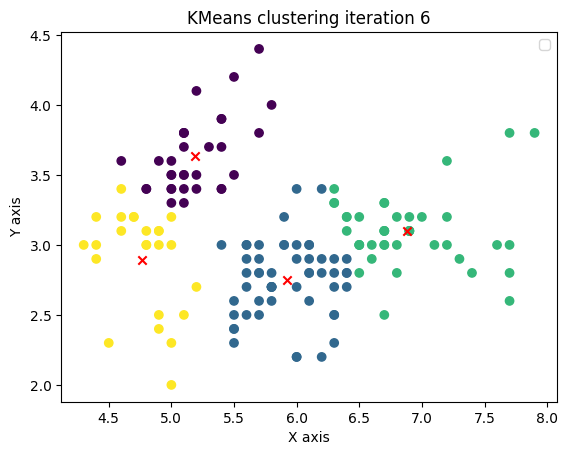

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


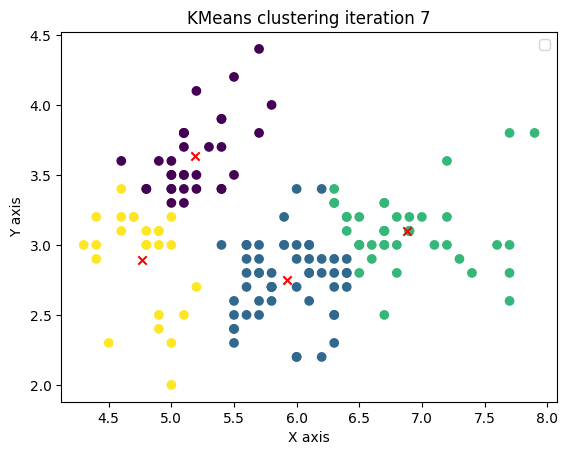

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


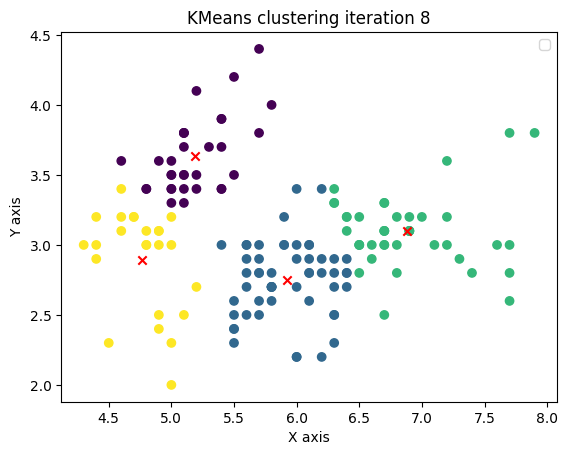

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


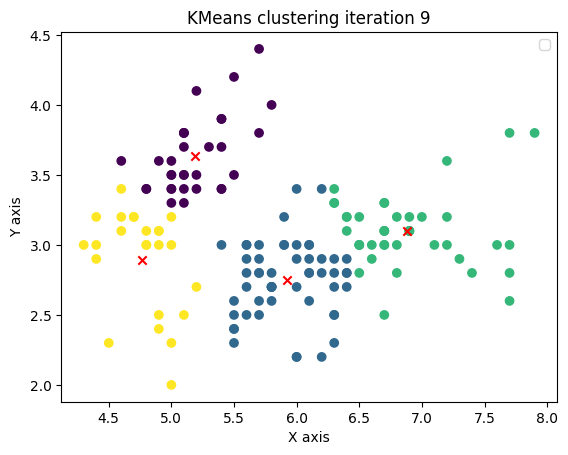

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


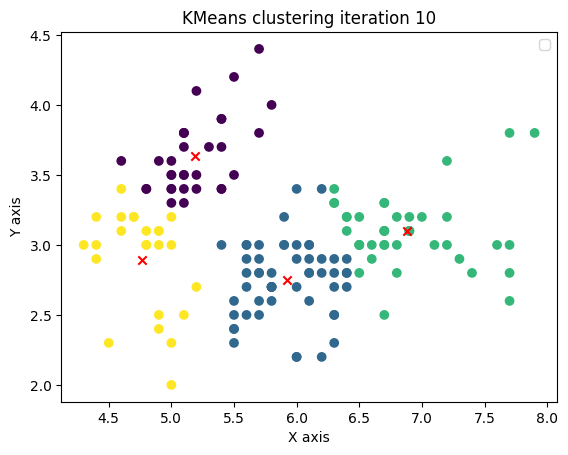

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


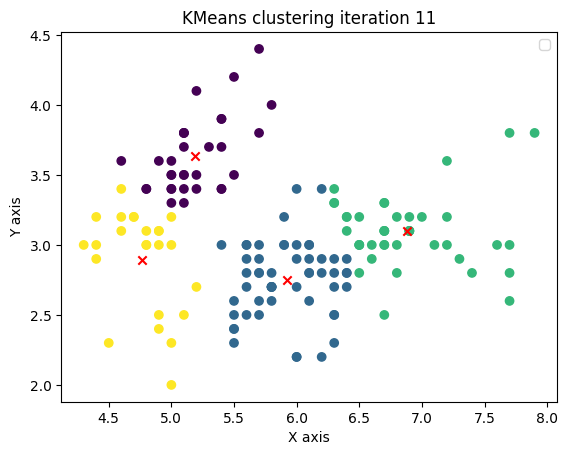

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


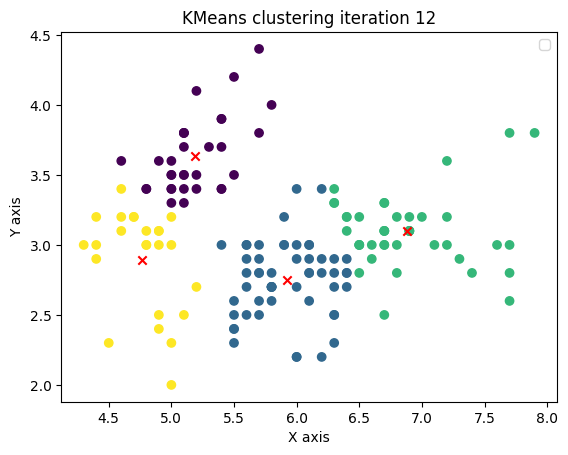

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


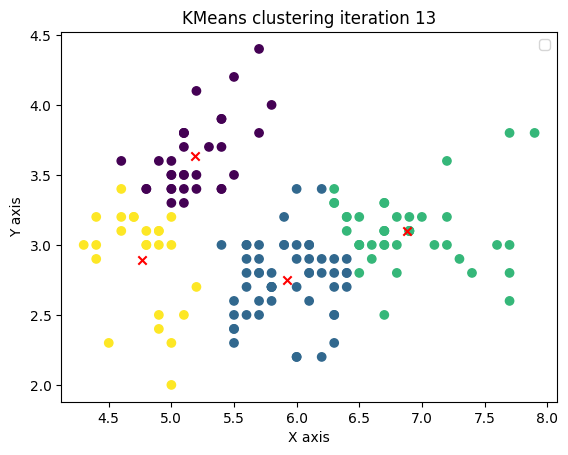

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


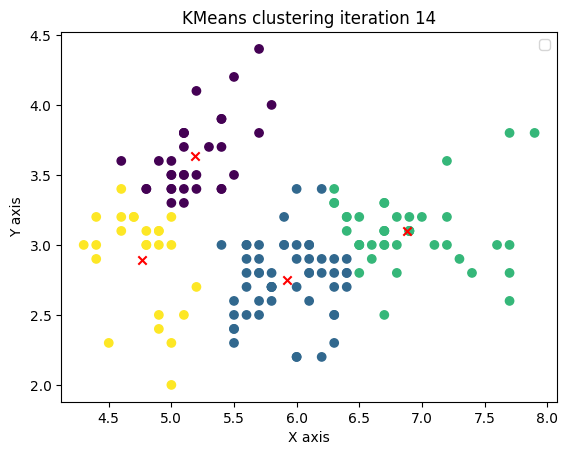

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


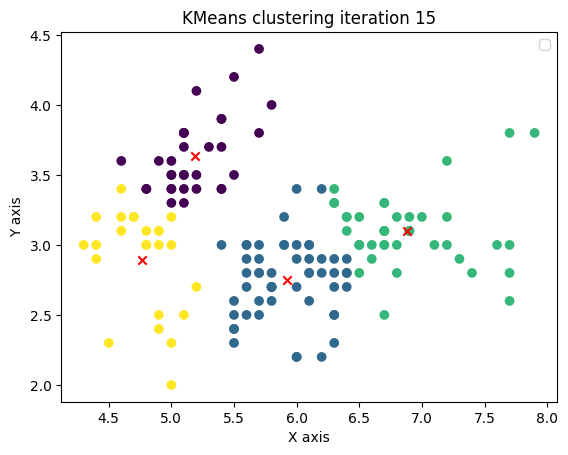

Cluster Labels:
[0 3 3 3 0 0 3 0 3 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 0 0 0 3 3 0
 0 3 0 0 3 3 0 0 3 0 3 0 0 2 2 2 1 2 1 2 3 2 3 3 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 3 1 2 1 2 1 2 2 3 2 2 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 1 1]

Centroids:
[[5.1875     3.6375    ]
 [5.9245283  2.7509434 ]
 [6.8804878  3.09756098]
 [4.76666667 2.89166667]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#Step 1: Initialize centroids
def initialize_centroids(X,K):
    indices=np.random.choice(X.shape[0],size=K,replace=False)
    #Ở đây np.random.choice với size K sẽ chọn ra K indices từ 0 đến X.shape[0]-1
    centroids=X[indices] #Return 1 array 2D gồm các initial centroids
    return centroids

#Step 2: Assign data points to the nearest centroids
def assign_cluster(X,centroids):
    cluster_labels=[]
    for x in X:
        distances=np.linalg.norm(x-centroids,axis=1)
        #The np.linalg.norm() function is used to calculate the Euclidean distance between x and each centroid along 
        #the specified axis (axis=1). The resulting distances array contains the distances between x and each centroid.
        cluster_labels.append(np.argmin(distances))
    return np.array(cluster_labels)


#Step 3: Update centroids
def update_centroids(X,cluster_labels,K):
    centroids=[]
    for k in range(K):
        cluster_points=X[cluster_labels==k]
        #return a list of cluster_points where cluster_labels=k
        if len(cluster_points)>0:
            centroids.append(np.mean(cluster_points,axis=0))
    return np.array(centroids)

#Step 4: KMeans clustering
def kmeans(X,K,max_iter=15,plot=True):
    centroids=initialize_centroids(X,K)
    for i in range(max_iter):
        prev_centroids=centroids.copy
        cluster_labels=assign_cluster(X,centroids)
        centroids=update_centroids(X,cluster_labels,K)
        if plot: 
            plt.scatter(X[:,0],X[:,1],c=cluster_labels)
            plt.scatter(centroids[:,0],centroids[:,1],c='red',marker='x')
            plt.xlabel('X axis')
            plt.ylabel('Y axis')
            plt.title(f'KMeans clustering iteration {i+1}')
            plt.legend()
            plt.show()
        if np.all(prev_centroids == centroids):
            break
    return cluster_labels, centroids

#load the iris dataset
iris=load_iris()
X=iris.data[:,:2]

K=4
cluster_labels,centroids=kmeans(X,K)



# Print the cluster labels and centroids
print("Cluster Labels:")
print(cluster_labels)
print("\nCentroids:")
print(centroids)

#Thêm elbow function



d:\SETUP\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\SETUP\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\SETUP\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\SETUP\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\SETUP\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

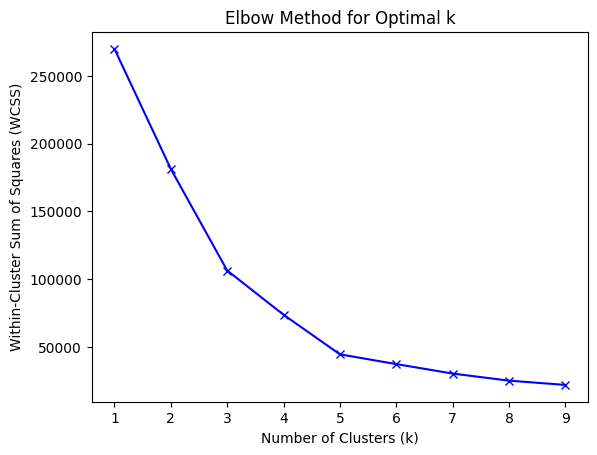

d:\SETUP\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


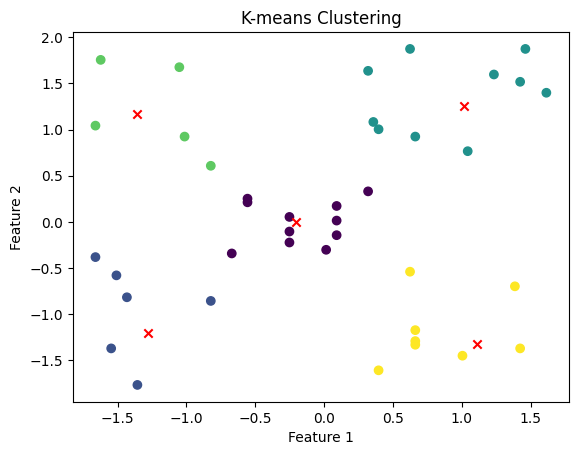

In [5]:
#Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

#Read the data
dataset=pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, 3].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
'''sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)'''

#Using the elbow method to find the optimal number of cluster
k_values=range(1,10)
wcss=[] #within cluster sum of squares

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  #interia stores WCSS value

#Plot the elbow curve:

plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

#Fitting KMeans to the dataset
optimal_k=5
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
kmeans.fit(X_train)

#Plot the cluster
labels = kmeans.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


PART 2: Hierarchical clustering

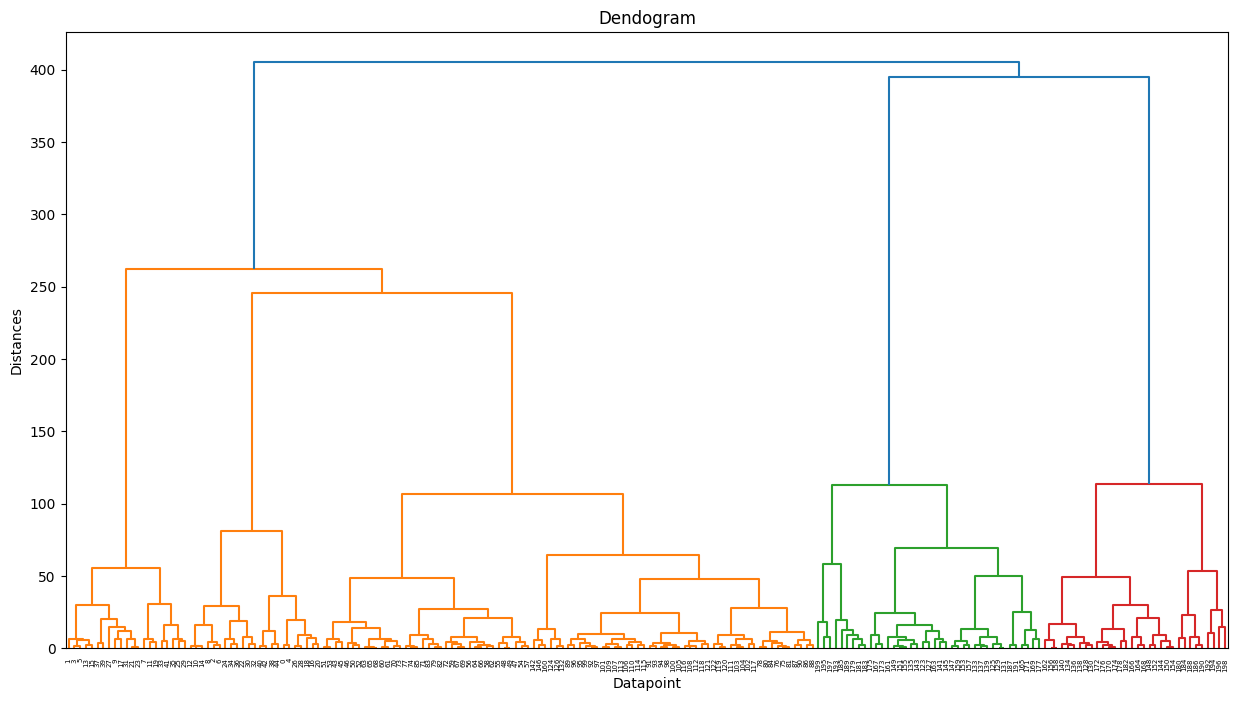

d:\SETUP\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


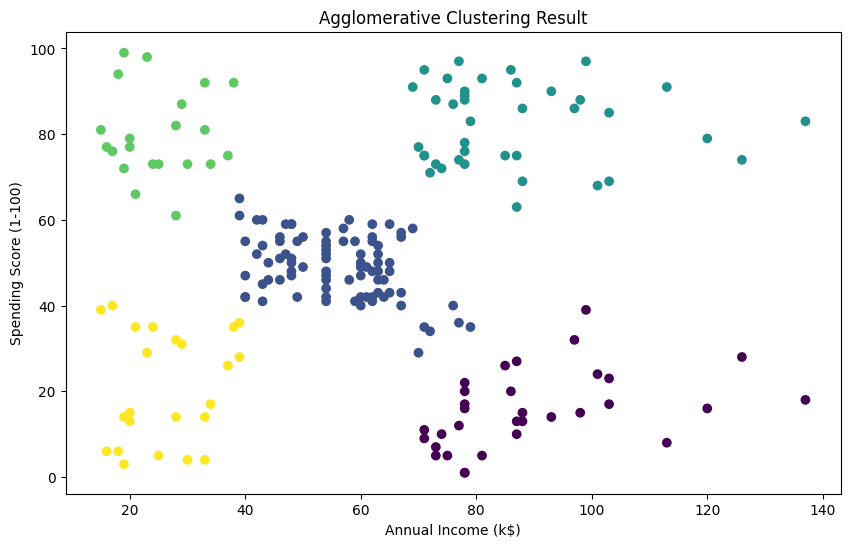

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

#Load the dataset
dataset=pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,3:].values #Extract the feature you want to cluster

#Generate the dendogram
linked=linkage(X,'ward')

#Plot the dendogram to find the optimal number of clusters
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top')
plt.title('Dendogram')
plt.xlabel('Datapoint')
plt.ylabel('Distances')
plt.show()

#Perform agglomerative clustering
agg_cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
labels=agg_cluster.fit_predict(X)
# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering Result')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


#Without using sklearn


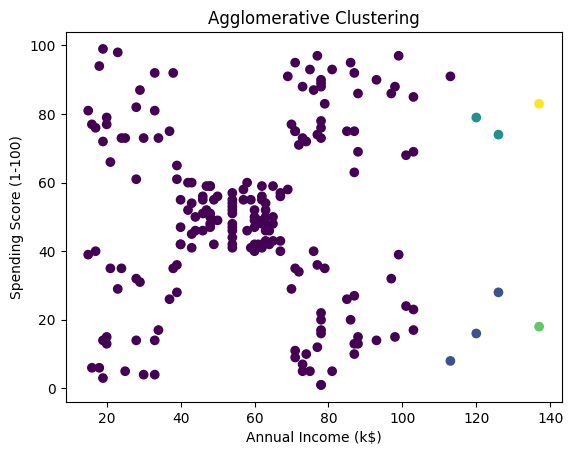

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform

#load the dataset
dataset=pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,3:].values

#Calculate the proximity matrix
dist_matrix=pdist(X,metric='euclidean')
dist_matrix=squareform(dist_matrix)

#Define the number of clusters:
n_clusters=5

#Initialize each datapoint as a separate cluster
clusters=[[i] for i in range(len(X))]

#Perform agglomerative clustering
while len(clusters)!=n_clusters:
    #Find the two closest cluster:
    min_dist=np.inf
    merge_clusters=(0,0)
    for i in range(len(clusters)-1):
        for j in range(i+1,len(clusters)):
            cluster_i=clusters[i]
            cluster_j=clusters[j]
            #Find the minimum distances between points in two clusters
            dist=min(dist_matrix[p1, p2] for p1 in cluster_i for p2 in cluster_j)
            if dist<min_dist:
                min_dist=dist
                merge_clusters=(i,j)
    # Merge the two closest clusters
    clusters[merge_clusters[0]].extend(clusters[merge_clusters[1]])
    del clusters[merge_clusters[1]]

# Assign cluster labels to each data point
labels = np.zeros(len(X), dtype=int)
for cluster_id, cluster in enumerate(clusters):
    labels[cluster] = cluster_id

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering')
plt.show()




#HMMM SO I THINK USING MIN DISTANCE IS A BAD IDEA :))))